# Stats3: Introduction to hypothesis testing


Hypothesis testing is a critical tool in inferential statistics, for determing what the value of a population parameter could be. We often draw this conclusion based on a sample data analysis.

The basis of hypothesis testing has two attributes:

**Null Hypothesis: $H_0$**
<br>**Alternative Hypothesis: $H_a$**

The tests we will discuss in this notebook are:

- One Population Proportion
- Difference in Population Proportions
- One Population Mean
- Difference in Population Means

In this notebook, we will also introduce some functions (from the `statsmodels` Python package) that are extremely useful when calculating a t-statistic, or a z-statistic, and corresponding p-values for a hypothesis test.

Let's quickly review the following ways to calculate a test statistic for the tests listed above.

The equation is:

$$\frac{Best\ Estimate - Hypothesized\ Estimate}{Standard\ Error\ of\ Estimate}$$

In [1]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## One Population Proportion

### Research Question 

In previous years, 52% of parents believed that electronics and social media was the cause of their teenager’s lack of sleep. Do more parents today believe that their teenager’s lack of sleep is caused due to electronics and social media? 

**Population**: Parents with a teenager (age 13-18)  
**Parameter of Interest**: p  

**Null Hypothesis:** p = 0.52  
**Alternative Hypthosis:** p > 0.52 (note that this is a one-sided test)

**Data**: 1018 people were surveyed. 56% of those who were surveyed believe that their teenager’s lack of sleep is caused due to electronics and social media.

### Use of `proportions_ztest()` from `statsmodels`

Note the argument `alternative="larger"` indicating a one-sided test. The function returns two values - the z-statistic and the corresponding p-value.

In [3]:
n = 1018
pnull = .52
phat = .56

In [5]:
sm.stats.proportions_ztest(phat * n, n, pnull, alternative='larger')

(2.571067795759113, 0.005069273865860533)

### Conclusion of the hypothesis test
Since the calculated p-value of the z-test is pretty small, we can reject the Null hypothesis that the percentage of parents, who believe that their teenager’s lack of sleep is caused due to electronics and social media, is as same as previous years' estimate i.e. 52%.

Although, we do not accept the alternate hypothesis, this informally means that there is a good chance of this proportion being more than 52%.

## Difference in Population Proportions

### Research Question

Is there a significant difference between the population proportions of parents of black children and parents of Hispanic children who report that their child has had some swimming lessons?

**Populations**: All parents of black children age 6-18 and all parents of Hispanic children age 6-18  
**Parameter of Interest**: p1 - p2, where p1 = black and p2 = hispanic  

**Null Hypothesis:** p1 - p2 = 0  
**Alternative Hypthosis:** p1 - p2 $\neq$ = 0  

**Data**: 247 Parents of Black Children. 36.8% of parents report that their child has had some swimming lessons. 
<br>308 Parents of Hispanic Children. 38.9% of parents report that their child has had some swimming lessons.

### Use of `ttest_ind()` from `statsmodels`
Difference in population proportion needs t-test. Also, the population follow a binomial distribution here. We can just pass on the two population quantities with the appropriate binomial distribution parameters to the t-test function.

The function returns three values: (a) test statisic, (b) p-value of the t-test, and (c) degrees of freedom used in the t-test.

In [10]:
n1 = 247
p1 = .37

n2 = 308
p2 = .39

population1 = np.random.binomial(1, p1, n1)
population2 = np.random.binomial(1, p2, n2)

In [13]:
np.mean(population1) 


0.3522267206477733

In [14]:
sm.stats.ttest_ind(population1, population2)

(-2.0614720954154615, 0.039724847284100126, 553.0)

### Conclusion of the hypothesis test
Since the p-value is quite high ~0.768, we cannot reject the Null hypothesis in this case i.e. the difference in the population proportions are not statistically significant.

### EXERCISE what happens if we could survey much higher number of people?
- keep the proportion but change number of survey participants in the two population (use n1 = n2 = 5000)
- rerun the test multiple times and memorize the obtain p-values 

**QUESTION**: what happen to the p-value?

In [22]:
n1 = 5000
p1 = .37

n2 = 5000
p2 = .39

In [23]:
population1 = np.random.binomial(1, p1, n1)
population2 = np.random.binomial(1, p2, n2)

In [24]:
sm.stats.ttest_ind(population1, population2)

(-0.8029004721699824, 0.42205134885637285, 9998.0)

## One Population Mean

### Research Question 

Let's say a cartwheeling competition was organized for some adults. The data looks like following,

(80.57, 98.96, 85.28, 83.83, 69.94, 89.59, 91.09, 66.25, 91.21, 82.7 , 73.54, 81.99, 54.01, 82.89, 75.88, 98.32, 107.2 , 85.53, 79.08, 84.3 , 89.32, 86.35, 78.98, 92.26, 87.01)

Is distance Is the average cartwheel distance (in inches) for adults more than 80 inches?

**Population**: All adults  
**Parameter of Interest**: $\mu$, population mean cartwheel distance.

**Null Hypothesis:** $\mu$ = 80 
<br>**Alternative Hypthosis**: $\mu$ > 80

**Data**:
<br>25 adult participants. 
<br>$\mu = 83.84$
<br>$\sigma = 10.72$

In [8]:
cwdata = np.array([80.57, 98.96, 85.28, 83.83, 69.94, 89.59, 91.09, 66.25, 91.21, 82.7 , 73.54, 81.99, 54.01, 
                 82.89, 75.88, 98.32, 107.2 , 85.53, 79.08, 84.3 , 89.32, 86.35, 78.98, 92.26, 87.01])

In [9]:
n = len(cwdata)
mean = cwdata.mean()
sd = cwdata.std()
(n, mean, sd)

(25, 83.84320000000001, 10.716018932420752)

In [10]:
sm.stats.ztest(cwdata, value = 80, alternative = "larger")

(1.756973189172546, 0.039461189601168366)

### Conclusion of the hypothesis test
Since the p-value  (0.0394) is lower than the standard confidence level 0.05, we can reject the Null hypothesis that the mean cartwheel distance for adults (a population quantity) is equal to 80 inches. There is strong evidence in support for the alternatine hypothesis that the mean cartwheel distance is, in fact, higher than 80 inches. Note, we used `alternative="larger"` in the z-test.

We can also plot the histogram of the data to check if it approximately follows a Normal distribution.

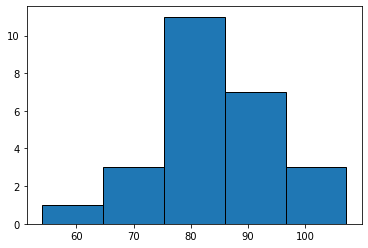

In [11]:
plt.hist(cwdata,bins=5,edgecolor='k')
plt.show()

## Difference in Population Means

### Research Question 

Considering adults in the [NHANES data](https://www.cdc.gov/nchs/nhanes/index.htm), do males have a significantly higher mean [Body Mass Index](https://www.cdc.gov/healthyweight/assessing/bmi/index.html) than females?

**Population**: Adults in the NHANES data.  
**Parameter of Interest**: $\mu_1 - \mu_2$, Body Mass Index.  

**Null Hypothesis:** $\mu_1 = \mu_2$  
**Alternative Hypthosis:** $\mu_1 \neq \mu_2$

**Data:**

2976 Females 
$\mu_1 = 29.94$  
$\sigma_1 = 7.75$  

2759 Male Adults  
$\mu_2 = 28.78$  
$\sigma_2 = 6.25$  

$\mu_1 - \mu_2 = 1.16$

In [25]:
url = "https://raw.githubusercontent.com/kshedden/statswpy/master/NHANES/merged/nhanes_2015_2016.csv"
df = pd.read_csv(url)
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


### EXERCISE: 
- split the data into 2 dataframes, one for male, one for females
- plot the histogram of the "BMXBMI" for the 2 dataframes, compute mean, median and std (and plot them on the histogram). Also inspecting the sweness and kurtosis can be usefull.
- run the appropriate test to decide whether the means of the "BMXBMI" are significantly different 
- if you decide to run a parametric test check for normality assumptions: use both visual inspection and formal tests (Shapiro-Wilk Test for example or others)
- if you decide to run a parametric test you can also run the nonparametric equivalent to check if your conclusion still holds 

In [27]:
male = df[df['RIAGENDR']==1]
female = df[df['RIAGENDR']==2]

In [39]:
male['BMXBMI'].dropna()

0       27.8
1       30.8
2       28.8
6       28.0
8       26.2
        ... 
5726    32.0
5728    32.9
5729    21.0
5731    33.8
5733    26.0
Name: BMXBMI, Length: 2718, dtype: float64

(array([  7.,  33.,  85., 160., 276., 323., 373., 345., 293., 213., 181.,
        129.,  90.,  48.,  44.,  26.,  28.,  18.,  10.,  11.,   8.,   4.,
          7.,   1.,   5.]),
 array([15.1  , 16.848, 18.596, 20.344, 22.092, 23.84 , 25.588, 27.336,
        29.084, 30.832, 32.58 , 34.328, 36.076, 37.824, 39.572, 41.32 ,
        43.068, 44.816, 46.564, 48.312, 50.06 , 51.808, 53.556, 55.304,
        57.052, 58.8  ]),
 <BarContainer object of 25 artists>)

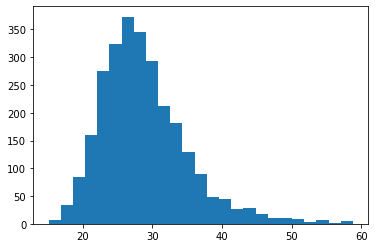

In [35]:
fig, axs = plt.subplots()
b(male['BMXBMI'].values,bins=25)

In [36]:
plt.hist?